In [1]:
import numpy as np
import matplotlib.pyplot as ppt
import torch.nn as nn
import torch

In [59]:
#Training Data
X=torch.linspace(1,50,50)

In [60]:
X

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50.])

In [11]:
#Create Noise
E=torch.randint(low=-8,high=10,size=(1,50),dtype=torch.float)

In [12]:
E

tensor([[-1., -7.,  4.,  6.,  6.,  2., -2., -4., -8.,  6., -6., -2., -8., -4.,
         -1.,  7., -2.,  1., -5.,  8.,  5.,  2.,  8., -4.,  7.,  6.,  5.,  5.,
         -6., -2.,  3., -6., -6.,  5.,  1., -8.,  4., -8.,  4., -1., -8.,  7.,
          9., -2.,  4.,  5., -6.,  9.,  4., -2.]])

In [13]:
#True Value
W=2
B=1
Y=W*X+B

In [14]:
Y

tensor([  3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,
         27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,
         51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,
         75.,  77.,  79.,  81.,  83.,  85.,  87.,  89.,  91.,  93.,  95.,  97.,
         99., 101.])

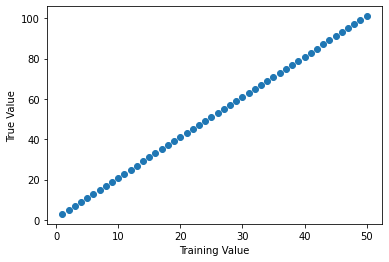

In [15]:
#Scatter without Noise
ppt.scatter(X.numpy(),Y.numpy())
ppt.xlabel("Training Value")
ppt.ylabel("True Value")
ppt.show()

In [16]:
#Add True value with noise
Y=W*X+B+E

In [17]:
Y

tensor([[  2.,  -2.,  11.,  15.,  17.,  15.,  13.,  13.,  11.,  27.,  17.,  23.,
          19.,  25.,  30.,  40.,  33.,  38.,  34.,  49.,  48.,  47.,  55.,  45.,
          58.,  59.,  60.,  62.,  53.,  59.,  66.,  59.,  61.,  74.,  72.,  65.,
          79.,  69.,  83.,  80.,  75.,  92.,  96.,  87.,  95.,  98.,  89., 106.,
         103.,  99.]])

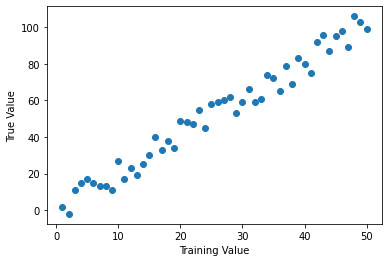

In [18]:
#Scatter Plot with noise
ppt.scatter(X.numpy(),Y.numpy())
ppt.xlabel("Training Value")
ppt.ylabel("True Value")
ppt.show()

In [102]:
#Create a Linear model
class LModel(nn.Module):
    def __init__(self,in_f,out_f):
        super().__init__()
        self.linear=nn.Linear(in_features=in_f,out_features=out_f)
        
    
    def forward(self,training_data):
        prediction=self.linear(training_data)
        return prediction

In [103]:
#Create a Model instance
linear_model=LModel(1,1)

In [104]:
#Get the parameters for the model
for name,param in linear_model.named_parameters():
    print(f'{name} \t {param.item()}')

linear.weight 	 -0.3441992998123169
linear.bias 	 0.3417891263961792


In [105]:
#Passing Data to the model to check its preditions before training
x_checking_data=np.linspace(0.0,50.0)

In [106]:
x_checking_data

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [107]:
#Get the first weight and bias
wf=0.6220
bf=-0.985

In [108]:
#Check the predicted data
yf=x_checking_data*wf+bf

In [109]:
yf

array([-0.985     , -0.35030612,  0.28438776,  0.91908163,  1.55377551,
        2.18846939,  2.82316327,  3.45785714,  4.09255102,  4.7272449 ,
        5.36193878,  5.99663265,  6.63132653,  7.26602041,  7.90071429,
        8.53540816,  9.17010204,  9.80479592, 10.4394898 , 11.07418367,
       11.70887755, 12.34357143, 12.97826531, 13.61295918, 14.24765306,
       14.88234694, 15.51704082, 16.15173469, 16.78642857, 17.42112245,
       18.05581633, 18.6905102 , 19.32520408, 19.95989796, 20.59459184,
       21.22928571, 21.86397959, 22.49867347, 23.13336735, 23.76806122,
       24.4027551 , 25.03744898, 25.67214286, 26.30683673, 26.94153061,
       27.57622449, 28.21091837, 28.84561224, 29.48030612, 30.115     ])

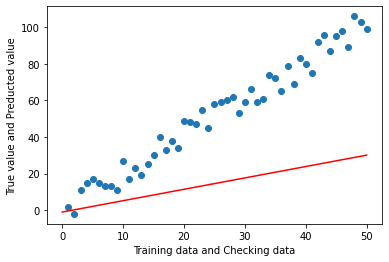

In [110]:
#Scatter and Plot of the predicted data and scatter true data with error
ppt.scatter(X.numpy(),Y.numpy())
ppt.plot(x_checking_data,yf,'r')
ppt.xlabel("Training data and Checking data")
ppt.ylabel("True value and Preducted value")
ppt.show()

In [111]:
#Set Epoch value (The number of rounds the model should be trained)
epoch=70

In [112]:
#Create a Gradient Scale (Stochastic Gradient Descent)
optimiser=torch.optim.SGD(linear_model.parameters(),lr=0.001)

In [113]:
#Create a Cost Function object (Mean Square Error)
cretition=nn.MSELoss()

In [114]:
#Create Loss variable
losses=[]

In [115]:
#Train the model with training data
for each_epoch in range(epoch):
    each_epoch+=1
    #Train the model and predict using linear object
    predition=linear_model.forward(X.reshape(-1,1))
    #get losses for each predition
    loss=cretition(predition,Y.reshape(-1,1))
    #print the losses
    print(f'{each_epoch} epoch: loss: {loss.item()} weight: {linear_model.linear.weight.item()} bias: {linear_model.linear.bias.item()}')
    #append the losses
    losses.append(loss)
    #Set Gradient to zero to prevent overwritting or compounding
    optimiser.zero_grad()
    #Do backpropogation with loss
    loss.backward()
    #Step the gradient
    optimiser.step()

1 epoch: loss: 4921.326171875 weight: -0.3441992998123169 bias: 0.3417891263961792
2 epoch: loss: 2554.513671875 weight: 3.7547998428344727 bias: 0.4636197090148926
3 epoch: loss: 1332.6131591796875 weight: 0.8096036911010742 bias: 0.37615767121315
4 epoch: loss: 701.789306640625 weight: 2.9257702827453613 bias: 0.4390755891799927
5 epoch: loss: 376.117431640625 weight: 1.405269742012024 bias: 0.3939431607723236
6 epoch: loss: 207.98458862304688 weight: 2.4977705478668213 bias: 0.4264465272426605
7 epoch: loss: 121.18360137939453 weight: 1.71278977394104 bias: 0.40316733717918396
8 epoch: loss: 76.37138366699219 weight: 2.276808261871338 bias: 0.41996872425079346
9 epoch: loss: 53.236419677734375 weight: 1.8715500831604004 bias: 0.4079715609550476
10 epoch: loss: 41.292625427246094 weight: 2.162731885910034 bias: 0.41666656732559204
11 epoch: loss: 35.12651824951172 weight: 1.9535112380981445 bias: 0.4104939103126526
12 epoch: loss: 31.943161010742188 weight: 2.103837251663208 bias: 0.

Text(0, 0.5, 'Error')

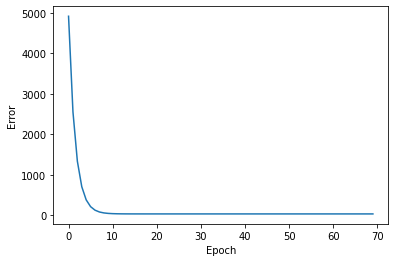

In [116]:
#Get Epoch graph
ppt.plot(range(epoch),torch.tensor(losses,requires_grad=False))
ppt.xlabel("Epoch")
ppt.ylabel("Error")

In [173]:
#Test the model with a test data
x=torch.linspace(1,50,100)

In [174]:
x

tensor([ 1.0000,  1.4949,  1.9899,  2.4848,  2.9798,  3.4747,  3.9697,  4.4646,
         4.9596,  5.4545,  5.9495,  6.4444,  6.9394,  7.4343,  7.9293,  8.4242,
         8.9192,  9.4141,  9.9091, 10.4040, 10.8990, 11.3939, 11.8889, 12.3838,
        12.8788, 13.3737, 13.8687, 14.3636, 14.8586, 15.3535, 15.8485, 16.3434,
        16.8384, 17.3333, 17.8283, 18.3232, 18.8182, 19.3131, 19.8081, 20.3030,
        20.7980, 21.2929, 21.7879, 22.2828, 22.7778, 23.2727, 23.7677, 24.2626,
        24.7576, 25.2525, 25.7475, 26.2424, 26.7374, 27.2323, 27.7273, 28.2222,
        28.7172, 29.2121, 29.7071, 30.2020, 30.6970, 31.1919, 31.6869, 32.1818,
        32.6768, 33.1717, 33.6667, 34.1616, 34.6566, 35.1515, 35.6465, 36.1414,
        36.6364, 37.1313, 37.6263, 38.1212, 38.6162, 39.1111, 39.6061, 40.1010,
        40.5960, 41.0909, 41.5859, 42.0808, 42.5758, 43.0707, 43.5657, 44.0606,
        44.5556, 45.0505, 45.5455, 46.0404, 46.5354, 47.0303, 47.5253, 48.0202,
        48.5152, 49.0101, 49.5051, 50.00

In [175]:
#Test the data in linear regression using the latest weight and bias
y=x*linear_model.linear.weight.item()+linear_model.linear.bias.item()
y

tensor([  2.4566,   3.4667,   4.4769,   5.4870,   6.4972,   7.5073,   8.5175,
          9.5276,  10.5378,  11.5479,  12.5580,  13.5682,  14.5783,  15.5885,
         16.5986,  17.6088,  18.6189,  19.6291,  20.6392,  21.6494,  22.6595,
         23.6697,  24.6798,  25.6900,  26.7001,  27.7103,  28.7204,  29.7306,
         30.7407,  31.7508,  32.7610,  33.7711,  34.7813,  35.7914,  36.8016,
         37.8117,  38.8219,  39.8320,  40.8422,  41.8523,  42.8625,  43.8726,
         44.8828,  45.8929,  46.9031,  47.9132,  48.9233,  49.9335,  50.9436,
         51.9538,  52.9639,  53.9741,  54.9842,  55.9944,  57.0045,  58.0147,
         59.0248,  60.0350,  61.0451,  62.0553,  63.0654,  64.0756,  65.0857,
         66.0959,  67.1060,  68.1161,  69.1263,  70.1364,  71.1466,  72.1567,
         73.1669,  74.1770,  75.1872,  76.1973,  77.2075,  78.2176,  79.2278,
         80.2379,  81.2481,  82.2582,  83.2684,  84.2785,  85.2887,  86.2988,
         87.3089,  88.3191,  89.3292,  90.3394,  91.3495,  92.35

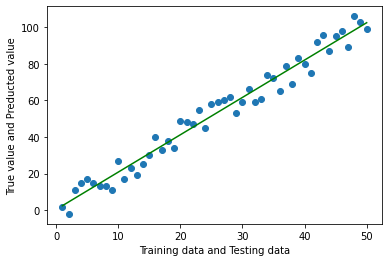

In [176]:
#Scatter and Plot of the predicted data and scatter true data with error
ppt.scatter(X.numpy(),Y.numpy())
ppt.plot(x,y,'g')
ppt.xlabel("Training data and Testing data")
ppt.ylabel("True value and Preducted value")
ppt.show()